<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_3/%5BProject%5D_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 21.3MB/s]


In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib . pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd


**Exercise 1**



<ipython-input-97-c22fc28cbed2>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age", #input x value


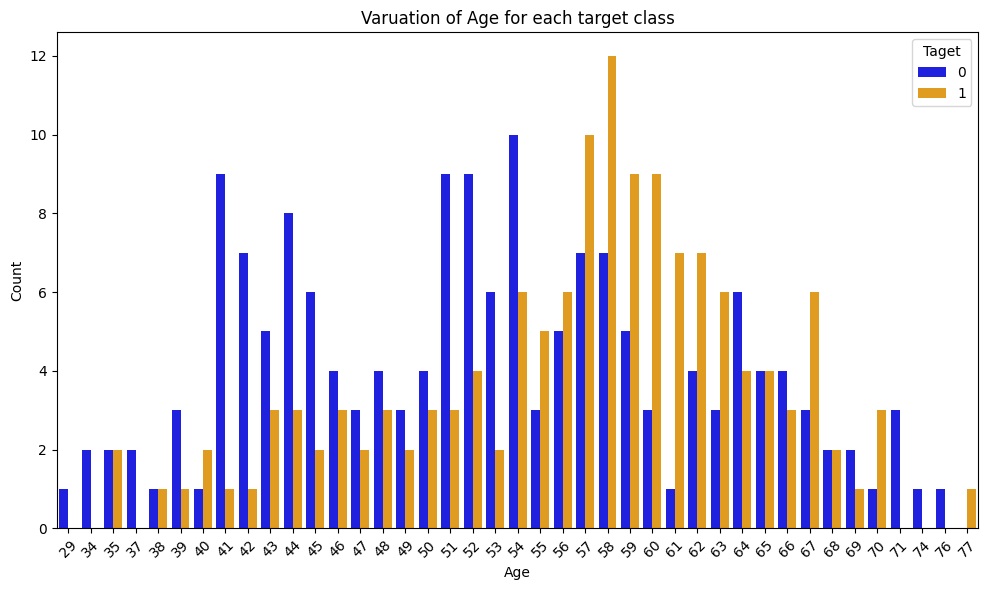

In [97]:

# Load the CSV file
df = pd.read_csv("cleveland.csv", header=None)

# Define the column names correctly
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Map the 'target' column values as specified
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Fill missing values in the 'thal' column with the mean
df['thal'] = df['thal'].fillna(df['thal'].mean())

# Fill missing values in the 'ca' column with the mean
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Display the first few rows to verify the changes


# distribution of target vs age
# Grouping age and target and count value 0 and 1 for each age
grouped_counts =df.groupby(['age', 'target']).size().reset_index(name='counts')

# Use seaborn barplit to create a bar chart showing the relationship between Age and Possibility of having Heart Diseases
plt.figure(figsize=(10,6))
sns.barplot(x="age", #input x value
            y="counts", #y value
            hue="target", # count of target["0", "1"]
            data=grouped_counts, #data
            palette={0: "blue", 1:"orange"}, #Choose color for values 0 and 1
            ci=None)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Varuation of Age for each target class")
plt.legend(title="Taget", labels=["0", "1"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show ()

**Exercise 2**

In [98]:
df["sex"]

,sex
0,1
1,1
2,1
3,1
4,0
...,...
298,1
299,1
300,1
301,0


<ipython-input-99-a1c64f3d6d05>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", #input x value


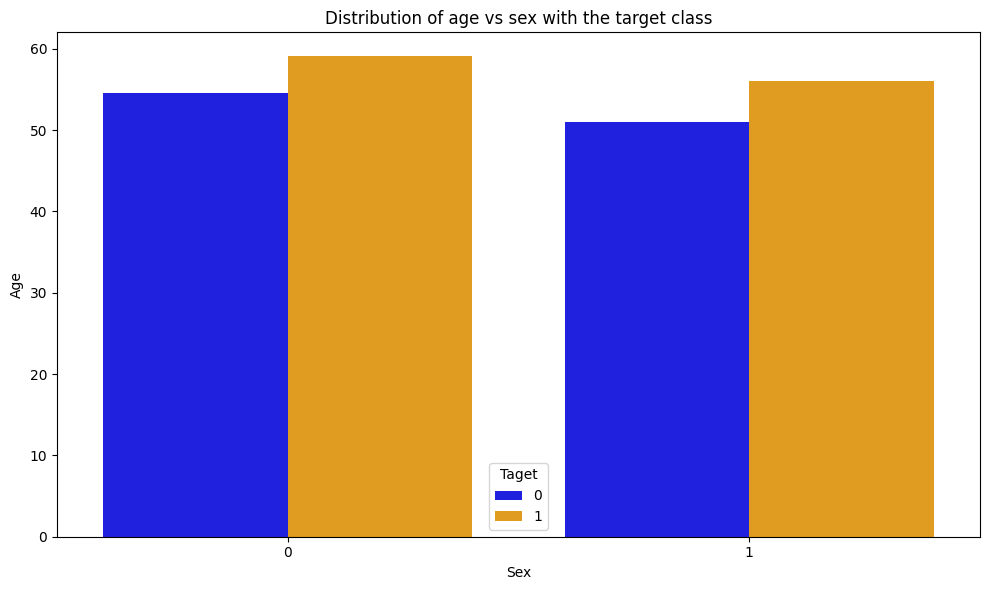

In [99]:
# Use seaborn barplit to create a bar chart showing the relationship between Age and Possibility of having Heart Diseases
plt.figure(figsize=(10,6))
sns.barplot(x="sex", #input x value
            y="age", #y value
            hue="target", # count of target["0", "1"]
            data=df, #data
            palette={0: "blue", 1:"orange"}, #Choose color for values 0 and 1
            ci=None)

plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Distribution of age vs sex with the target class")
plt.legend(title="Taget", labels=["0", "1"])
plt.xticks(rotation=None)
plt.tight_layout()
plt.show ()

**Exercise 3 (KNN)**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights="uniform",
                           algorithm="auto",
                           leaf_size=30,
                           p=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
'''
The resulting cm_train/cm_test will give you insight into how well your model is performing on the training set,
including the number of correct and incorrect predictions made for each class.

'''
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_test_pred = KNN.predict(X_test)
y_train_pred = KNN.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np. round ((cm_train[0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round ((cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for KNeighborsClassifier = {}". format (accuracy_for_train ))
print ("Accuracy for test set for KNeighborsClassifier = {} ". format ( accuracy_for_test ))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69 


**Exercise 4**


> Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is one of the most powerful and versatile algorithms used in a wide range of applications, particularly for classification problems. The main idea behind SVM is to find the optimal hyperplane that best separates data points of different classes in a high-dimensional space.





In [102]:
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf", random_state=42)
svc.fit(X_train, y_train)
y_test_pred= svc.predict(X_test)
y_train_pred = svc.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for SVM = {} ".format(accuracy_for_train ))
print ("Accuracy for test set for SVM = {}".format(accuracy_for_test))

Accuracy for training set for SVM = 0.66 
Accuracy for test set for SVM = 0.67


**Exercise 5 (Naive Bayes)**

In [104]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train, y_train)

y_test_pred= gaus.predict(X_test)
y_train_pred = gaus.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set = {} ".format(accuracy_for_train ))
print ("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.85 
Accuracy for test set = 0.84


**Exercise 6 (Decision Tree)**

In [105]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2)
decision_tree.fit(X_train, y_train)

y_test_pred= decision_tree.predict(X_test)
y_train_pred = decision_tree.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set = {} ".format(accuracy_for_train ))
print ("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 1.0 
Accuracy for test set = 0.75


**Exercise 7 (Random Forest)**

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="gini", max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
forest.fit(X_train, y_train)

y_test_pred= forest.predict(X_test)
y_train_pred = forest.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set  = {} ".format(accuracy_for_train ))
print ("Accuracy for test set for = {}".format(accuracy_for_test))

Accuracy for training set  = 0.98 
Accuracy for test set for = 0.8


**Exercise 8 (Adaboost)**

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
adaboost.fit(X_train, y_train)

y_test_pred= adaboost.predict(X_test)
y_train_pred = adaboost.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set = {} ".format(accuracy_for_train ))
print ("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.91 
Accuracy for test set = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Exercise 9 (Gradient Boost)**

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate=0.1,
                                      n_estimators=100,
                                      subsample=1.0, #Choosing `subsample < 1.0` leads to a reduction of variance and an increase in bias
                                      min_samples_split=2,
                                      max_depth=3,
                                      random_state=42
                                      )
gradient.fit(X_train, y_train)

y_test_pred= gradient.predict(X_test)
y_train_pred = gradient.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set = {} ".format(accuracy_for_train ))
print ("Accuracy for test set = {}".format(accuracy_for_test))


Accuracy for training set = 1.0 
Accuracy for test set = 0.85


In [109]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

**Exercise 10 (XGBoost)**

In [110]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)
xgboost.fit(X_train, y_train)


y_test_pred= xgboost.predict(X_test)
y_train_pred = xgboost.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)
accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ("Accuracy for training set= {} ".format(accuracy_for_train ))
print ("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set= 1.0 
Accuracy for test set = 0.87


# **Exercise 11 (Stacking method)**

In [111]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel="rbf", random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Define based class
base_classifiers = [
    ('decision_tree', dtc),
    ('random_forest', rfc),
    ('knn', knn),
    ('gradient_boosting', gc),
    ('svc', svc),
    ('adaboost', ad)
]

# Define final estimator
xgb = XGBClassifier(random_state=42)

# Using Stacking to classify
stacking = StackingClassifier(estimators=base_classifiers, final_estimator=xgb)
stacking.fit(X_train, y_train)

# Evaluate model
y_test_pred= stacking.predict(X_test)
y_train_pred = stacking.predict(X_train)

cm_train= confusion_matrix(y_train, y_train_pred)
cm_test= confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] +cm_train[1][1])/len(y_train),2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,3)
print ("Accuracy for training set {} ".format(accuracy_for_train ))
print ("Accuracy for test set {}".format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set 0.92 
Accuracy for test set 0.902
